<a href="https://colab.research.google.com/github/PauloSanchez/Data_science_UL/blob/main/Ejercicio_tipo_examen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tomar en cuenta el DF que les acabo de explicar, que me deben hacer el pre-procesamiento, realizar 4 graficas con su respectiva explicación (Univariables, multivariables

Hacer un clasificador optimizado para predecir el nivel de riesgo de una mujer embarazada. Realizar un benchmark de al menos 3 modelos.

Hacer una regresión a la columna que cada uno desee, no es necesario optimizar.

#Analisis exploratorio y preprosesamiento de datos.

In [683]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [684]:
filename = '/content/drive/MyDrive/Colab Notebooks/Archivos ejercicios/Copia de Maternal Health Risk Data Set.csv'
df = pd.read_csv(filename)

In [685]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Como podemos ver los tipos de datos se relaciónan con la información en cada colimna, por lo que solo resta clasificar numericamente las variables categoricas de la columna RiskLevel, no se encuentran valores nulos...

In [687]:
#Valores duplicados

#En este caso, no eliminaremos valores duplicados por que puede ser que una persona (no identificadas en este DF) tenga los mismos valores que otra.
#Por lo que se decide continuar sin eliminar duplicados.


In [688]:
#Variables categoricas

#Convertiremos las variables categoricas de RiskLevel a numericas del tipo entero.

df.loc[df.RiskLevel=='low risk','RiskLevel']='0' #cero es igual a bajo nivel de riesgo.
df.loc[df.RiskLevel=='mid risk','RiskLevel']='1' #uno es igual a medio nivel de riesgo.
df.loc[df.RiskLevel=='high risk','RiskLevel']='2' #dos es igual a alto nivel de riesgo.

#Una vez realizado el reemplazo, debemos dar formato a las columnas afectadas y aquellas float.
df['RiskLevel'] = df['RiskLevel'].astype(int)

In [689]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


Se observa que el tipo de datos de la columna RiskLevel fue modificado a entero, tal como se requiere.

In [691]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


Se observa una relación directamente proporcional entre las personas de menor edad a bajo riesgo, versus las de mayor edad que tienen más riesgo ( ver valores minimos y máximos.

#Visualizaciones

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

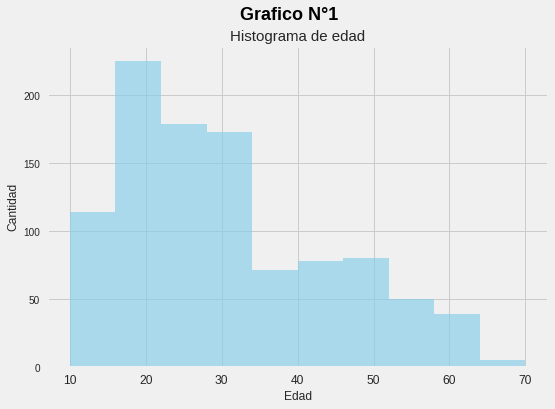

In [692]:
plt.suptitle('Grafico N°1', fontsize=18,fontweight="bold", c="k")
plt.title('Histograma de edad', fontsize=15)
plt.hist(df['Age'], color='skyblue', alpha=0.65)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(size=12)


Observamos que la mayor cantidad de la población se centra entre los 15 y los 35 años, se puede decir que tiene una especie de distribución normal.

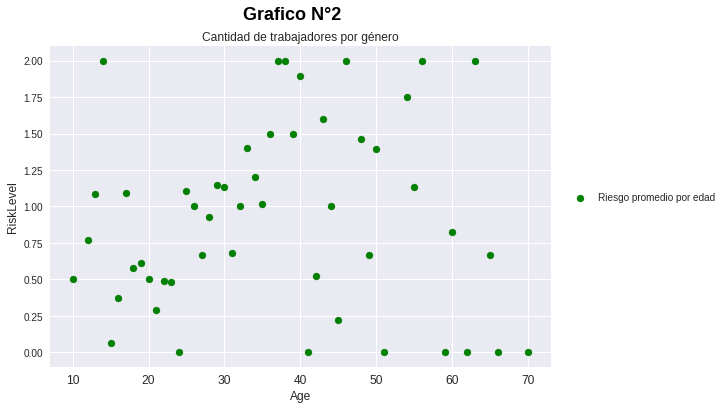

In [693]:

grafico1=df.groupby(['Age'])['RiskLevel'].mean()
x=np.array(grafico1.index)
y=np.array(grafico1.values)

#Graficamos
plt.style.use('seaborn')
plt.suptitle('Grafico N°2', fontsize=18,fontweight="bold", c="k")
plt.title('Cantidad de trabajadores por género', fontsize=12)
plt.scatter(x, y, c="g")
plt.xlabel('Age', fontsize=12)
plt.ylabel('RiskLevel', fontsize=12)
plt.xticks(size=12)
plt.legend(['Riesgo promedio por edad'], loc=(1.03,0.5))

Observamos que la dispersión de los datos a primera vista no refleja una tendencia clara de relación edad/riesgo, sin emabrgo, podemos ver una tendencia directa entre estas de manera ascentende, es decir mientras más edad mayor riesgo.

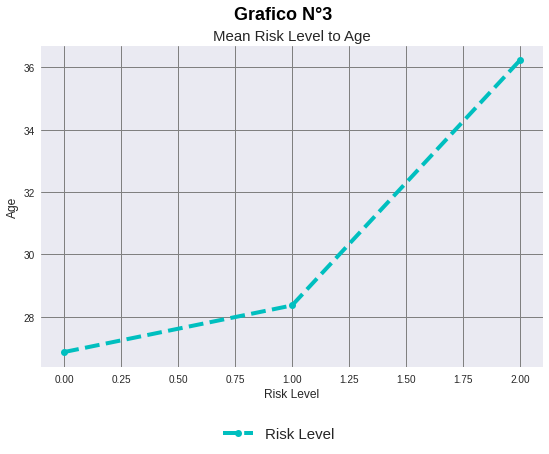

In [694]:
#Grafico 3

#Obtenemos los datos para graficar
data4=df.groupby(['RiskLevel'])['Age'].mean()
x4=np.array(data4.index)
y4=np.array(data4.values)


#Graficamos
plt.suptitle('Grafico N°3', fontsize=18,fontweight="bold", c="k")
plt.title('Mean Risk Level to Age',fontsize=15)
plt.xlabel('Risk Level',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.style.use('fivethirtyeight')
plt.plot(x4, y4, 'c--o')
plt.grid(True,c='grey')
plt.legend(['Risk Level'],loc=(0.35,-0.25), fontsize=15)

Se observa un punto de inflexion en donde a partir de los 28 años y meses, el riesgo comienza a aumentar sostenidamente conforme avanza la edad.

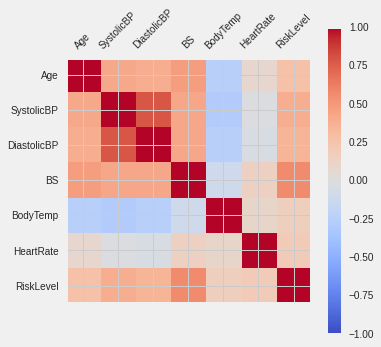

In [695]:
matriz = df.corr()

plt.matshow(matriz,cmap='coolwarm',vmin=-1, vmax=1)
plt.xticks(range(7), matriz.columns,rotation=45)
plt.yticks(range(7), matriz.columns)
plt.colorbar()


En el grafico de correlación se observa una correlación del vector objetivo RiskLavel con Age, SystolicBP, DiastolicBP y BS, las demas las dejaremos fuera del modelo.

#Modelos de clasificación y benchmarking

##KNN

In [696]:
#Importamos librerias.
#Metodo KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Metodo Arbool de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [698]:
#Definir las variables para el modelo

X = df[['Age','SystolicBP','DiastolicBP','BS']].values
y = df['RiskLevel'].values

In [699]:
#Split del modelo para datos de entrenamiento y testeo.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [700]:
#estandarización de datos.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [701]:
n_neighbors=2
knn = KNeighborsClassifier(n_neighbors)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
y_predict

array([0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2,
       1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0,

In [702]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.74


In [703]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test, y_predict))

[[109  10   0]
 [ 40  60   3]
 [  4  22  57]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       119
           1       0.65      0.58      0.62       103
           2       0.95      0.69      0.80        83

    accuracy                           0.74       305
   macro avg       0.77      0.73      0.74       305
weighted avg       0.76      0.74      0.74       305



El modelo de KNN se optimisa con 2 vecinos y mejora su matriz de confusión.

##Arbol de decisión

In [704]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_clf = DecisionTreeClassifier(max_depth=18)
tree_clf.fit(X_train, y_train)
tree_clf.predict(X_test)
print('Accuracy of Tree classifier on training set: {:.2f}'
     .format(tree_clf.score(X_train, y_train)))
print('Accuracy of Tree classifier on test set: {:.2f}'
     .format(tree_clf.score(X_test, y_test)))

Accuracy of Tree classifier on training set: 0.94
Accuracy of Tree classifier on test set: 0.77


Se ajusta el modelo con 18 de profundidad, quedando un accuracy del data test en 0.79 lo más alto, por sobre 18 tiende a bajar.

##Random Forest

In [705]:
#Libreria
from sklearn.ensemble import RandomForestClassifier


In [706]:
rf_clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)
#Entrenar el modelo
rf_clf.fit(X_train, y_train)

#Predecir para múltiples observaciones a la vez
rf_clf.predict(X_test[0:10])


rf_clf.predict(X_test)


array([0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1,
       0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2,
       1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 1,
       2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1,
       0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0,

In [707]:
# calcular la precisión de clasificación para el modelo que se entrenó
score = rf_clf.score(X_test, y_test)
score

0.780327868852459

In [708]:
#Error de generalización (out-of-sample error)

rf_clf.oob_score_

0.8660084626234132

Se concluye que el modelo realizado con decision tree fue el que tuvo mayor precisión en cuanto a la predicción de X_test, con un 79%, mientras que knn un 74% y Random forest un 78%.

#Regresión lineal

In [709]:
#Importamos libreria
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [710]:
#Definir variables para realizar regresión lineal

x1 = df[['RiskLevel','SystolicBP','DiastolicBP', 'BS']].values

y1 = df['Age'].values

In [711]:
#División de datos
X_train, X_test, y_train, y_test = train_test_split(x1, y1, train_size=0.7, random_state=0)


In [712]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [718]:
#Crear instancia
lr = LinearRegression()
lr.fit(X_train,y_train)
y1_predict = lr.predict(X_test)

In [719]:
#Calcular R cuadrado
r2_score(y_test, y1_predict)

0.34029237758175